In [55]:
import warnings
warnings.filterwarnings("ignore")

import libraries to help us

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

reading our data set

In [57]:
data=pd.read_excel("Bike_Sales_New.xlsx")
data.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2018-07-01,1,July,2018,33,Young Adults (25-34),F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,30,1,2,30,30,60
1,2018-07-01,1,July,2018,41,Adults (35-64),M,Germany,Hessen,Accessories,Bottles and Cages,Road Bottle Cage,28,3,9,168,84,252
2,2018-07-01,1,July,2018,33,Young Adults (25-34),F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,24,1,2,24,24,48
3,2018-07-01,1,July,2018,37,Adults (35-64),M,France,Nord,Accessories,Tires and Tubes,LL Road Tire,24,8,21,312,192,504
4,2018-07-01,1,July,2018,30,Young Adults (25-34),F,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,Road Tire Tube,22,1,4,66,22,88


In [58]:
data.shape

(69407, 18)

we are going to do the pre processing of our data to ensure clearence

In [59]:
data.isnull().sum()
#checking for missing values

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

we have no missing data in our data set secondly we look for duplicates.

In [60]:
data.drop_duplicates()
data.shape

(69407, 18)

we have no duplicates in our dataset

In [61]:
cont_data=data.select_dtypes(exclude="object")
cont_data.head(10)

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,2018,33,30,1,2,30,30,60
1,1,2018,41,28,3,9,168,84,252
2,1,2018,33,24,1,2,24,24,48
3,1,2018,37,24,8,21,312,192,504
4,1,2018,30,22,1,4,66,22,88
5,1,2018,42,22,1,2,22,22,44
6,1,2018,42,21,1,2,21,21,42
7,1,2018,19,19,2,5,57,38,95
8,1,2018,37,12,8,21,156,96,252
9,1,2018,19,10,2,5,30,20,50


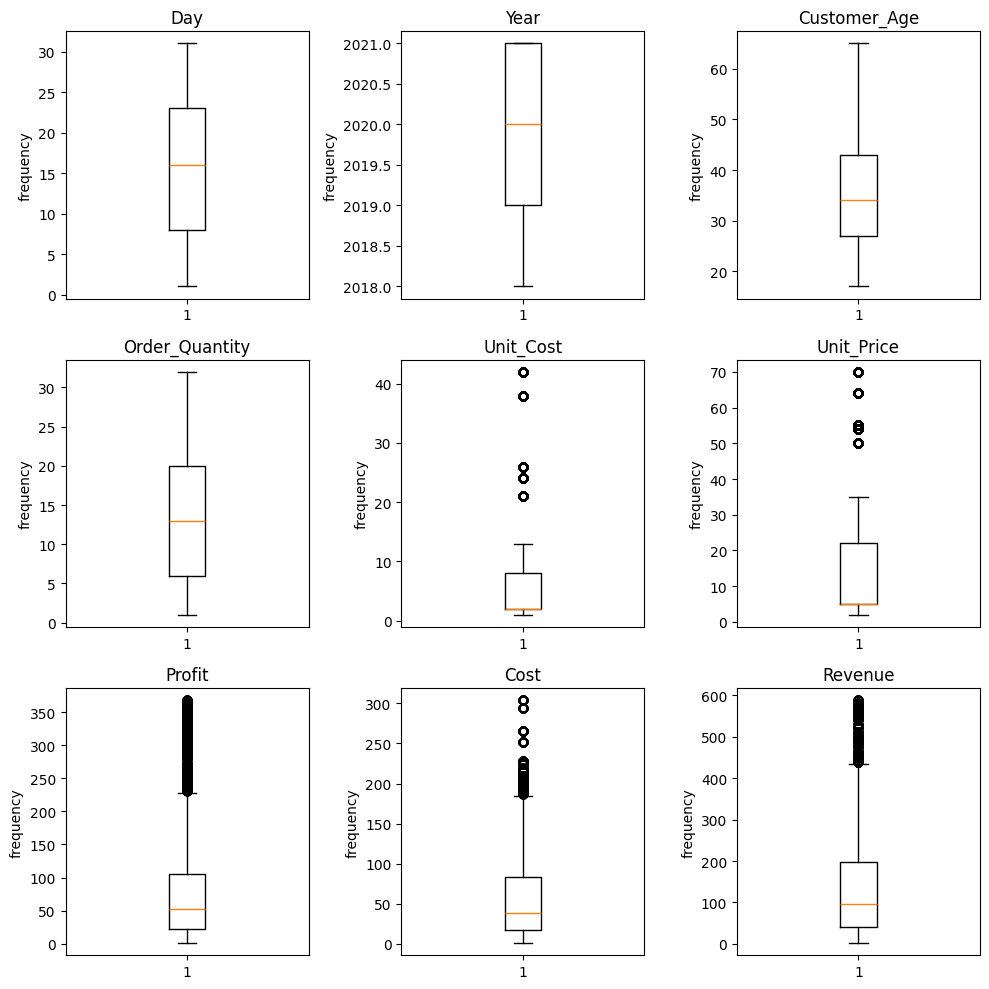

In [62]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cont_data[col])
    plt.ylabel(f'frequency')
    plt.title(col)
plt.tight_layout()
plt.show()    

from the box plots we have outliers in unit cost, revenue, profit, cost, unit price and we need to remove them

In [63]:
def remove_outliers(data,columns):
    for column in columns:
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower_bound=q1-IQR*1.5
        upper_bound=q3+IQR*1.5
        data[column]=np.where(data[column]>upper_bound,upper_bound,data[column])
        data[column]=np.where(data[column]<lower_bound,lower_bound,data[column])
    return data

columns_to_clean=['Unit_Cost','Revenue','Profit','Cost','Unit_Price']
cleaned=remove_outliers(cont_data,columns_to_clean)

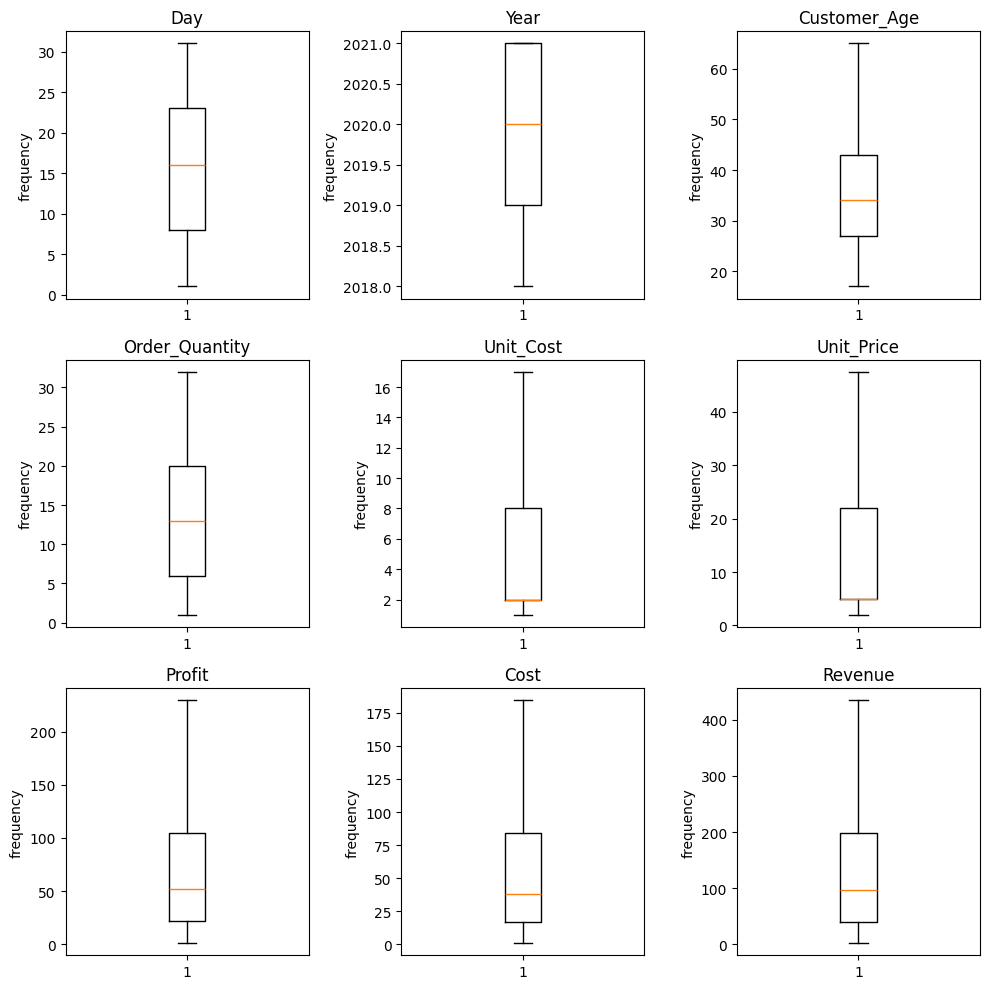

In [64]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cleaned.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cleaned[col])
    plt.ylabel(f'frequency')
    plt.title(col)
plt.tight_layout()
plt.show()    

from our graph we see that the outliers have been eliminated we can proceed with finding the relationship between our variables.

In [65]:
correction_matrix=cleaned.corr()
correction_matrix

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.004730,-0.014051,-0.006153,0.009361,0.009100,0.003524,0.002087,0.002676
Year,-0.004730,1.000000,0.013931,-0.027872,0.007623,0.007033,-0.013650,-0.012544,-0.013174
Customer_Age,-0.014051,0.013931,1.000000,0.001100,0.027857,0.028399,0.037189,0.030607,0.035473
Order_Quantity,-0.006153,-0.027872,0.001100,1.000000,-0.324337,-0.336141,0.277294,0.294402,0.287061
Unit_Cost,0.009361,0.007623,0.027857,-0.324337,1.000000,0.981812,0.580238,0.666036,0.647909
Unit_Price,0.009100,0.007033,0.028399,-0.336141,0.981812,1.000000,0.610352,0.623434,0.647327
Profit,0.003524,-0.013650,0.037189,0.277294,0.580238,0.610352,1.000000,0.832637,0.960390
Cost,0.002087,-0.012544,0.030607,0.294402,0.666036,0.623434,0.832637,1.000000,0.949723
Revenue,0.002676,-0.013174,0.035473,0.287061,0.647909,0.647327,0.960390,0.949723,1.000000


from the correleration matrix we see that revenue is correllated with unit_cost, unit_price, profit and cost and these are going to be our predictors for the revenue


In [66]:
data_new=cleaned

In [67]:
x=data_new[['Unit_Cost','Unit_Price','Profit','Cost']]
y=data_new['Revenue']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=model.predict(x_test)

evalaute the accurancy of our model

In [71]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f'r^2 value is {r2 : .3f}')
print(f'root_mean_squared_error value is {rmse : .3f}')
print(f'mean_squared_error value is {mse: .3f}')

r^2 value is  0.997
root_mean_squared_error value is  7.556
mean_squared_error value is  57.091


In [72]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(x_train,y_train)
y_pred=RF_model.predict(x_test)
r2=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f'r^2 value is {r2 : .3f}')
print(f'root_mean_squared_error value is {rmse : .3f}')
print(f'mean_squared_error value is {mse: .3f}')

r^2 value is  1.000
root_mean_squared_error value is  1.097
mean_squared_error value is  1.204


In [73]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
r2=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f'r^2 value is {r2 : .3f}')
print(f'root_mean_squared_error value is {rmse : .3f}')
print(f'mean_squared_error value is {mse: .3f}')


r^2 value is  1.000
root_mean_squared_error value is  1.097
mean_squared_error value is  1.203


the dt model is the most accurate model we have because it has the least number of errors

In [74]:
import pickle
with open("Decision_model.pkl","wb") as file:
    pickle.dump(dt_model,file)
    